In [1]:
!pip install pyprind

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import os
import pyprind 
import seaborn as sns
from pylab import rcParams
from collections import defaultdict
from scipy.optimize import curve_fit
from sklearn.model_selection import train_test_split
from collections import Counter
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

!pip install --force https://github.com/chengs/tqdm/archive/colab.zip
from tqdm import tqdm_notebook as tqdm

     / 491kB 4.6MB/s
  Stored in directory: /tmp/pip-ephem-wheel-cache-lydavxt6/wheels/41/18/ee/d5dd158441b27965855b1bbae03fa2d8a91fe645c01b419896
Successfully built tqdm
  Found existing installation: tqdm 4.28.1
    Uninstalling tqdm-4.28.1:
      Successfully uninstalled tqdm-4.28.1


In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(1)

In [0]:
# load labels and captions
def read_caps(fname):
    """Load the captions into a dataframe"""
    vn = []
    cap = []
    df = pd.DataFrame();
    with open(fname) as f:
        for line in f:
            pairs = line.split()
            vn.append(pairs[0])
            cap.append(pairs[1])
        df['video']=vn
        df['caption']=cap
    return df


# load the captions
caption_file = '/content/drive/My Drive/CA684_Assignment_Data/dev-set/dev-set_video-captions.txt'
df_cap = read_caps(caption_file)

# load the ground truth values
ground_truth_file = '/content/drive/My Drive/CA684_Assignment_Data/dev-set/dev-set_ground-truth.csv'
ground_truth = pd.read_csv(ground_truth_file)

In [0]:
print(ground_truth)

In [7]:
from string import punctuation
counts = Counter()
# setup prograss tracker
pbar = pyprind.ProgBar(len(df_cap['caption']), title='Counting word occurrences')
for i, cap in enumerate(df_cap['caption']):
    # replace punctuations with space
    # convert words to lower case 
    text = ''.join([c if c not in punctuation else ' ' for c in cap]).lower()
    df_cap.loc[i,'caption'] = text
    pbar.update()
    counts.update(text.split())

Counting word occurrences
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:03


In [8]:
from keras.preprocessing.text import Tokenizer
# build the word index
len_token = len(counts)
tokenizer = Tokenizer(num_words=len_token)
print(len_token)

5191


Using TensorFlow backend.


In [0]:
tokenizer.fit_on_texts(list(df_cap.caption.values)) #fit a list of captions to the tokenizer
#the tokenizer vectorizes a text corpus, by turning each text into either a sequence of integers

In [10]:
print(len(tokenizer.word_index))

5191


In [0]:
one_hot_res = tokenizer.texts_to_matrix(list(df_cap.caption.values),mode='binary')
sequences = tokenizer.texts_to_sequences(list(df_cap.caption.values))

In [12]:
#Just to visualise some stuff in sequences and counts
print(sequences[0]) # prints location of words from caption 0 'blonde woman is massaged tilt down'
print(counts['blonde']) # no. of occurences of 'blonde'
n=3
print('Least Common: ', counts.most_common()[:-n-1:-1])       # n least common elements
print('Most Common: ',counts.most_common(n)) 

[724, 7, 35, 884, 384, 91]
10
Least Common:  [('unknown', 1), ('handheldshowing', 1), ('longof', 1)]
Most Common:  [('in', 2105), ('the', 1835), ('on', 1724)]


In [0]:
# calculating max length
max_len = 50

In [0]:
print(sequences[0]) # length of 1st sequence

[724, 7, 35, 884, 384, 91]


In [14]:
X_seq = np.zeros((len(sequences),max_len))
for i in range(len(sequences)):
    n = len(sequences[i])
    if n==0:
        print(i)
    else:
        X_seq[i,-n:] = sequences[i]
X_seq.shape

(6000, 50)

In [15]:
X_seq[0,:]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
       724.,   7.,  35., 884., 384.,  91.])

In [0]:
Y = ground_truth[['short-term_memorability','long-term_memorability']].values
#X = X_seq # sequences
X = one_hot_res # one-hot-res

In [46]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)
X_train.shape

(4800, 5191)

In [0]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X=scaler.fit_transform(X)
#X


In [0]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=0)
# pca.fit(X)

In [47]:
!pip list | grep -i keras

Keras                    2.2.4                
Keras-Applications       1.0.7                
Keras-Preprocessing      1.0.9                
keras-vis                0.4.1                


In [48]:
pip install --upgrade keras

Requirement already up-to-date: keras in /usr/local/lib/python3.6/dist-packages (2.2.4)


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]



In [0]:
input_dim = 5191

In [0]:
#visible1 = Input(shape=(X.shape))


In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Conv1D, GlobalMaxPooling1D, Dropout
from keras.layers.core import Flatten, Dense, Activation
from keras import backend as K
from keras import Input
from keras.layers import Embedding
from keras.optimizers import SGD, Adam, Adadelta
from keras import regularizers

np.random.seed(0)

model = Sequential()

model.add(Embedding(5191,100, input_length=5191))

model.add(Conv1D(64, 5, activation='selu', kernel_initializer='zeros', kernel_regularizer=regularizers.l2(0.001)))
model.add(GlobalMaxPooling1D())
model.add(Dense(10, activation='selu',  kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(10, activation='selu',  kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler(feature_range=(0, 1))

# X_train_scaled = scaler.fit_transform(X_train)
# X_train = pd.DataFrame(X_train_scaled)

# X_test_scaled = scaler.fit_transform(X_test)
# X_test = pd.DataFrame(X_test_scaled)

In [53]:
X_train.shape

(4800, 5191)

In [54]:
history = model.fit(X_train, Y_train, epochs = 15, validation_data=(X_test, Y_test))



Train on 4800 samples, validate on 1200 samples
Epoch 1/15
4800/4800 [==============================] - 5s 1ms/step - loss: 0.5538 - acc: 0.0396 - val_loss: 0.4919 - val_acc: 0.0400
Epoch 2/15
4800/4800 [==============================] - 4s 904us/step - loss: 0.5065 - acc: 0.0433 - val_loss: 0.4835 - val_acc: 0.0400
Epoch 3/15
4800/4800 [==============================] - 4s 909us/step - loss: 0.4901 - acc: 0.0433 - val_loss: 0.4762 - val_acc: 0.0400
Epoch 4/15
4800/4800 [==============================] - 4s 903us/step - loss: 0.4801 - acc: 0.0433 - val_loss: 0.4728 - val_acc: 0.0400
Epoch 5/15
4800/4800 [==============================] - 4s 894us/step - loss: 0.4745 - acc: 0.0433 - val_loss: 0.4711 - val_acc: 0.0400
Epoch 6/15
4800/4800 [==============================] - 4s 886us/step - loss: 0.4726 - acc: 0.0433 - val_loss: 0.4709 - val_acc: 0.0400
Epoch 7/15
4800/4800 [==============================] - 4s 878us/step - loss: 0.4715 - acc: 0.0433 - val_loss: 0.4705 - val_acc: 0.0400
Ep

In [0]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# training_error = model.evaluate(X_train, Y_train, verbose = 1)
# print('training error = ' + str(training_error))
# testing_error = model.evaluate(X_test, Y_test, verbose = 1)
# print('training error = ' + str(testing_error))

In [0]:
# from sklearn.neighbors import KNeighborsRegressor
# knn = KNeighborsRegressor(n_neighbors=1,p=2,metric="euclidean")
# knn.fit(X_train,Y_train)

# Y_pred = knn.predict(X_test)

In [0]:
def Get_score(Y_pred,Y_true):
    '''Calculate the Spearmann"s correlation coefficient'''
    Y_pred = np.squeeze(Y_pred)
    Y_true = np.squeeze(Y_true)
    if Y_pred.shape != Y_true.shape:
        print('Input shapes don\'t match!')
    else:
        if len(Y_pred.shape) == 1:
            Res = pd.DataFrame({'Y_true':Y_true,'Y_pred':Y_pred})
            score_mat = Res[['Y_true','Y_pred']].corr(method='spearman',min_periods=1)
            print('The Spearman\'s correlation coefficient is: %.3f' % score_mat.iloc[1][0])
        else:
            for ii in range(Y_pred.shape[1]):
                Get_score(Y_pred[:,ii],Y_true[:,ii])


In [57]:
Get_score(test_predict, Y_test)

The Spearman's correlation coefficient is: 0.162
The Spearman's correlation coefficient is: 0.089


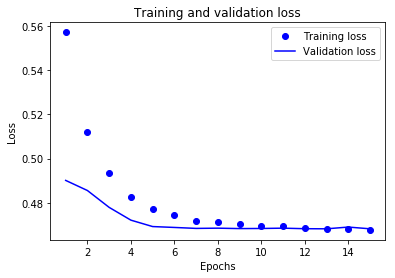

In [39]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

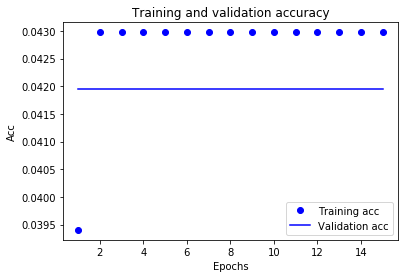

In [40]:
plt.figure()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [58]:
predictions = model.predict(X_test)
print(predictions.shape)

(1200, 2)


In [0]:
final_results = pd.DataFrame({'video':ground_truth['video'][4800:],
                              'Short-term-pred':predictions[:,0],'Long-term-pred':predictions[:,1], 
                              'Short-term-true':ground_truth['short-term_memorability'][4800:], 
                              'Long-term-true':ground_truth['long-term_memorability'][4800:]})

final_results = final_results.reset_index(drop=True)

In [0]:
final_results.to_csv('/content/drive/My Drive/CNN_results.csv')